In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
import os
cpu_count = os.cpu_count() - 1
cpu_count

3

In [2]:
car_blend = pd.read_csv('make_hard_blend.csv')
car_blend

,car_id,target_class,model_1,model_2,model_3,model_4,model_5
0,car_0,NaN,electro_bug,gear_stick,electro_bug,electro_bug,engine_ignition
1,car_1,NaN,engine_check,engine_overheat,electro_bug,engine_overheat,engine_overheat
2,car_2,NaN,another_bug,electro_bug,engine_overheat,engine_overheat,gear_stick
3,car_3,NaN,electro_bug,electro_bug,electro_bug,wheel_shake,electro_bug
4,car_4,NaN,engine_ignition,another_bug,engine_check,engine_check,engine_check
...,...,...,...,...,...,...,...
1908,car_1908,NaN,break_bug,break_bug,engine_overheat,break_bug,another_bug
1909,car_1909,NaN,break_bug,break_bug,wheel_shake,break_bug,gear_stick
1910,car_1910,NaN,engine_overheat,engine_overheat,engine_overheat,engine_overheat,break_bug
1911,car_1911,NaN,engine_check,engine_check,engine_check,electro_bug,break_bug


In [20]:
car_blend['target_class'] = car_blend.drop(columns=['car_id','target_class']).apply(lambda x: x.mode(), axis=1)[0]

In [22]:
car_blend[['car_id', 'target_class']].to_csv('submission_car_blend.csv', index=False)

In [28]:
cat_preds = pd.read_csv('catboost_preds.csv')

In [30]:
lgbm_preds = pd.read_csv('lgbm_preds.csv')
xgb_preds = pd.read_csv('xgb_preds.csv')

In [31]:
tot_preds = cat_preds + lgbm_preds + xgb_preds
tot_preds

,another_bug_proba,break_bug_proba,electro_bug_proba,engine_check_proba,engine_fuel_proba,engine_ignition_proba,engine_overheat_proba,gear_stick_proba,wheel_shake_proba
0,0.337219,0.344227,0.353973,0.314100,0.346557,0.322595,0.336272,0.352935,0.292123
1,0.479751,0.442886,0.292707,0.333411,0.280346,0.284728,0.328361,0.325581,0.232230
2,0.348240,0.342305,0.317633,0.329424,0.307271,0.362316,0.348468,0.359000,0.285343
3,0.339210,0.347235,0.317740,0.374427,0.301501,0.341304,0.311298,0.377495,0.289790
4,0.359307,0.372359,0.335765,0.314143,0.331229,0.346983,0.335586,0.364043,0.240584
...,...,...,...,...,...,...,...,...,...
580,0.369099,0.341373,0.305871,0.342375,0.330898,0.326672,0.325671,0.366269,0.291773
581,0.339598,0.333036,0.288180,0.336054,0.308584,0.371604,0.303122,0.416257,0.303565
582,0.331052,0.395528,0.270822,0.383494,0.339379,0.317954,0.315611,0.353631,0.292527
583,0.324123,0.358697,0.324760,0.341667,0.334138,0.321043,0.351365,0.364555,0.279653


In [34]:
fails = tot_preds.columns
fails

Index(['another_bug_proba', 'break_bug_proba', 'electro_bug_proba',
       'engine_check_proba', 'engine_fuel_proba', 'engine_ignition_proba',
       'engine_overheat_proba', 'gear_stick_proba', 'wheel_shake_proba'],
      dtype='object')

In [47]:
pd.DataFrame(tot_preds.idxmax(axis=1).str.replace('_proba', ''), columns=['soft_preds']).to_csv('sub_total_preds.csv', index=False)

In [49]:
rank = pd.DataFrame({'id': [0, 1, 2, 3, 4], 'proba': [.374540, .950714, .731994, .598658, .156019]})
rank

,id,proba
0,0,0.374540
1,1,0.950714
2,2,0.731994
3,3,0.598658
4,4,0.156019


In [89]:
rank_new = rank.sort_values(by='proba').reset_index(drop=True).reset_index().rename(columns={'index': 'normalized_proba'})
rank_new['normalized_proba'] = rank_new['normalized_proba'].add(1).div(len(rank_new))
rank_new.set_index('id').sort_index().reset_index()['normalized_proba']

0    0.4
1    1.0
2    0.8
3    0.6
4    0.2
Name: normalized_proba, dtype: float64

In [94]:
rank['proba'].rank(pct=1)

0    0.4
1    1.0
2    0.8
3    0.6
4    0.2
Name: proba, dtype: float64

In [97]:
rank2 = pd.DataFrame({'id': [0, 1, 2, 3, 4],
              'proba1': [.374540, .950714, .731994, .598658, .156019],
              'proba2': [.374540, .950714, .731994, .598658, .156019]})
rank2

,id,proba1,proba2
0,0,0.374540,0.374540
1,1,0.950714,0.950714
2,2,0.731994,0.731994
3,3,0.598658,0.598658
4,4,0.156019,0.156019


In [101]:
rank2[['proba1','proba2']].rank(pct=1).mean(axis=1)

0    0.4
1    1.0
2    0.8
3    0.6
4    0.2
dtype: float64

### Stacking

#### Классифицируем тексты

In [4]:
train = pd.read_csv('temp/text_classification_train.csv')
train.head()

,category,text,ruBert-base_text_feature_0,ruBert-base_text_feature_1,ruBert-base_text_feature_2,ruBert-base_text_feature_3,ruBert-base_text_feature_4,ruBert-base_text_feature_5,ruBert-base_text_feature_6,ruBert-base_text_feature_7,...,labse_text_feature_758,labse_text_feature_759,labse_text_feature_760,labse_text_feature_761,labse_text_feature_762,labse_text_feature_763,labse_text_feature_764,labse_text_feature_765,labse_text_feature_766,labse_text_feature_767
0,extreme,Ледник Пасторури это цирковой ледник расположе...,0.272156,0.155383,0.060285,0.363159,-0.140391,0.507753,-0.226326,0.431878,...,-0.045795,-0.027475,0.030528,-0.052218,0.042459,-0.012714,-0.055370,-0.012433,-0.016283,-0.006994
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...,0.439223,0.343683,0.093642,0.245294,0.089770,0.424717,-0.071487,0.185970,...,-0.022664,0.042258,-0.027394,-0.033566,0.016021,-0.022054,-0.040366,0.007392,-0.029070,-0.011284
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...,-0.040338,0.058095,-0.091063,0.296028,-0.137103,0.931456,-0.169060,0.131503,...,-0.009464,0.011548,-0.046034,0.024588,-0.013670,-0.047028,0.009395,-0.000488,-0.060260,0.006563
3,autosport,В Сильверстоуне произошли крупные обновления а...,0.444181,0.218742,0.247859,0.234885,0.006668,0.407703,-0.115768,0.433781,...,-0.045474,-0.043454,-0.000961,-0.012203,-0.047922,-0.054657,-0.053768,0.018481,-0.039148,-0.038874
4,extreme,На протяжении более чем 30 лет Вестсайд являет...,-0.126253,-0.115856,0.131131,0.052595,0.060591,0.420976,0.090776,0.246287,...,0.004818,-0.008138,-0.013958,-0.038482,-0.002943,-0.035970,-0.010830,-0.005132,-0.047990,-0.005869


In [14]:
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [6]:
np.__version__

'1.24.3'

In [8]:
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0, random_state=42)

In [16]:
num_class=train.category.nunique()
l_model = lgb.LGBMClassifier(objective='multiclass', num_class=num_class, learning_rate=0.1, n_estimators=100, random_state=42)

In [18]:
x_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_class, learning_rate=0.1, n_estimators=100, )

In [20]:
class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - метамодель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        #TODO
        data_meta = np.empty((len(X_hold), 0))
        for idx, model in enumerate(self.base_models):
            model.fit(X_train, y_train)
            pred = model.predict(X_hold)
            data_meta = np.column_stack([data_meta, pred])
        self.meta_model.fit(data_meta, y_hold)

    def predict(self, X_test):
        #TODO
        data = np.empty((len(X_test), 0))
        for model in self.base_models:
            data = np.column_stack([data, model.predict(X_test)])
        preds = self.meta_model.predict(data)
        return preds

In [26]:
X = train.drop(columns=['category', 'text'])
y = train.category

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(y)
le.classes_

array(['athletics', 'autosport', 'basketball', 'boardgames', 'esport',
       'extreme', 'football', 'hockey', 'martial_arts', 'motosport',
       'tennis', 'volleyball', 'winter_sport'], dtype=object)

In [50]:
le.inverse_transform(labels)

array(['extreme', 'martial_arts', 'extreme', ..., 'motosport', 'tennis',
       'motosport'], dtype=object)

In [54]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, labels, random_state=42, shuffle=True)

In [38]:
test = pd.read_csv('temp/text_classification_test.csv')
X_test = test.drop(columns=['text'])

In [56]:
base_models = [cat_model, l_model, x_model]
meta_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0, random_state=42)
reg = Blender(base_models, meta_model)
reg.fit(X_train, y_train, X_holdout, y_holdout)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667080
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 2616
[LightGBM] [Info] Start training from score -2.471661
[LightGBM] [Info] Start training from score -2.486508
[LightGBM] [Info] Start training from score -2.557334
[LightGBM] [Info] Start training from score -2.543666
[LightGBM] [Info] Start training from score -2.568868
[LightGBM] [Info] Start training from score -2.597105
[LightGBM] [Info] Start training from score -2.592343
[LightGBM] [Info] Start training from score -2.550477
[LightGBM] [Info] Start training from score -2.568868
[LightGBM] [Info] Start training from score -2.606698
[LightGBM] [Info] Start training from score -2.555043
[LightGBM] [Info] Start training from score -2.621261
[LightGBM] [Info] Start training from score -2.638524


In [58]:
preds = reg.predict(X_test)

In [73]:
pd.DataFrame(le.inverse_transform(preds.ravel()), columns=['category']).to_csv('subm_stack.csv', index=False)

In [7]:
word_len_avg = train.text.apply(lambda x: sum( map(lambda w: len(w), x.split())) / len(x.split()))

In [8]:
word_count = train.text.apply(lambda x: len(x.split()))

In [9]:
text = pd.DataFrame({'text': train.text, 'cat': train.category, 'len_avg': word_len_avg, 'count': word_count})

In [ ]:
text.groupby('category', as_index=False)['count'].transform(np.mean)

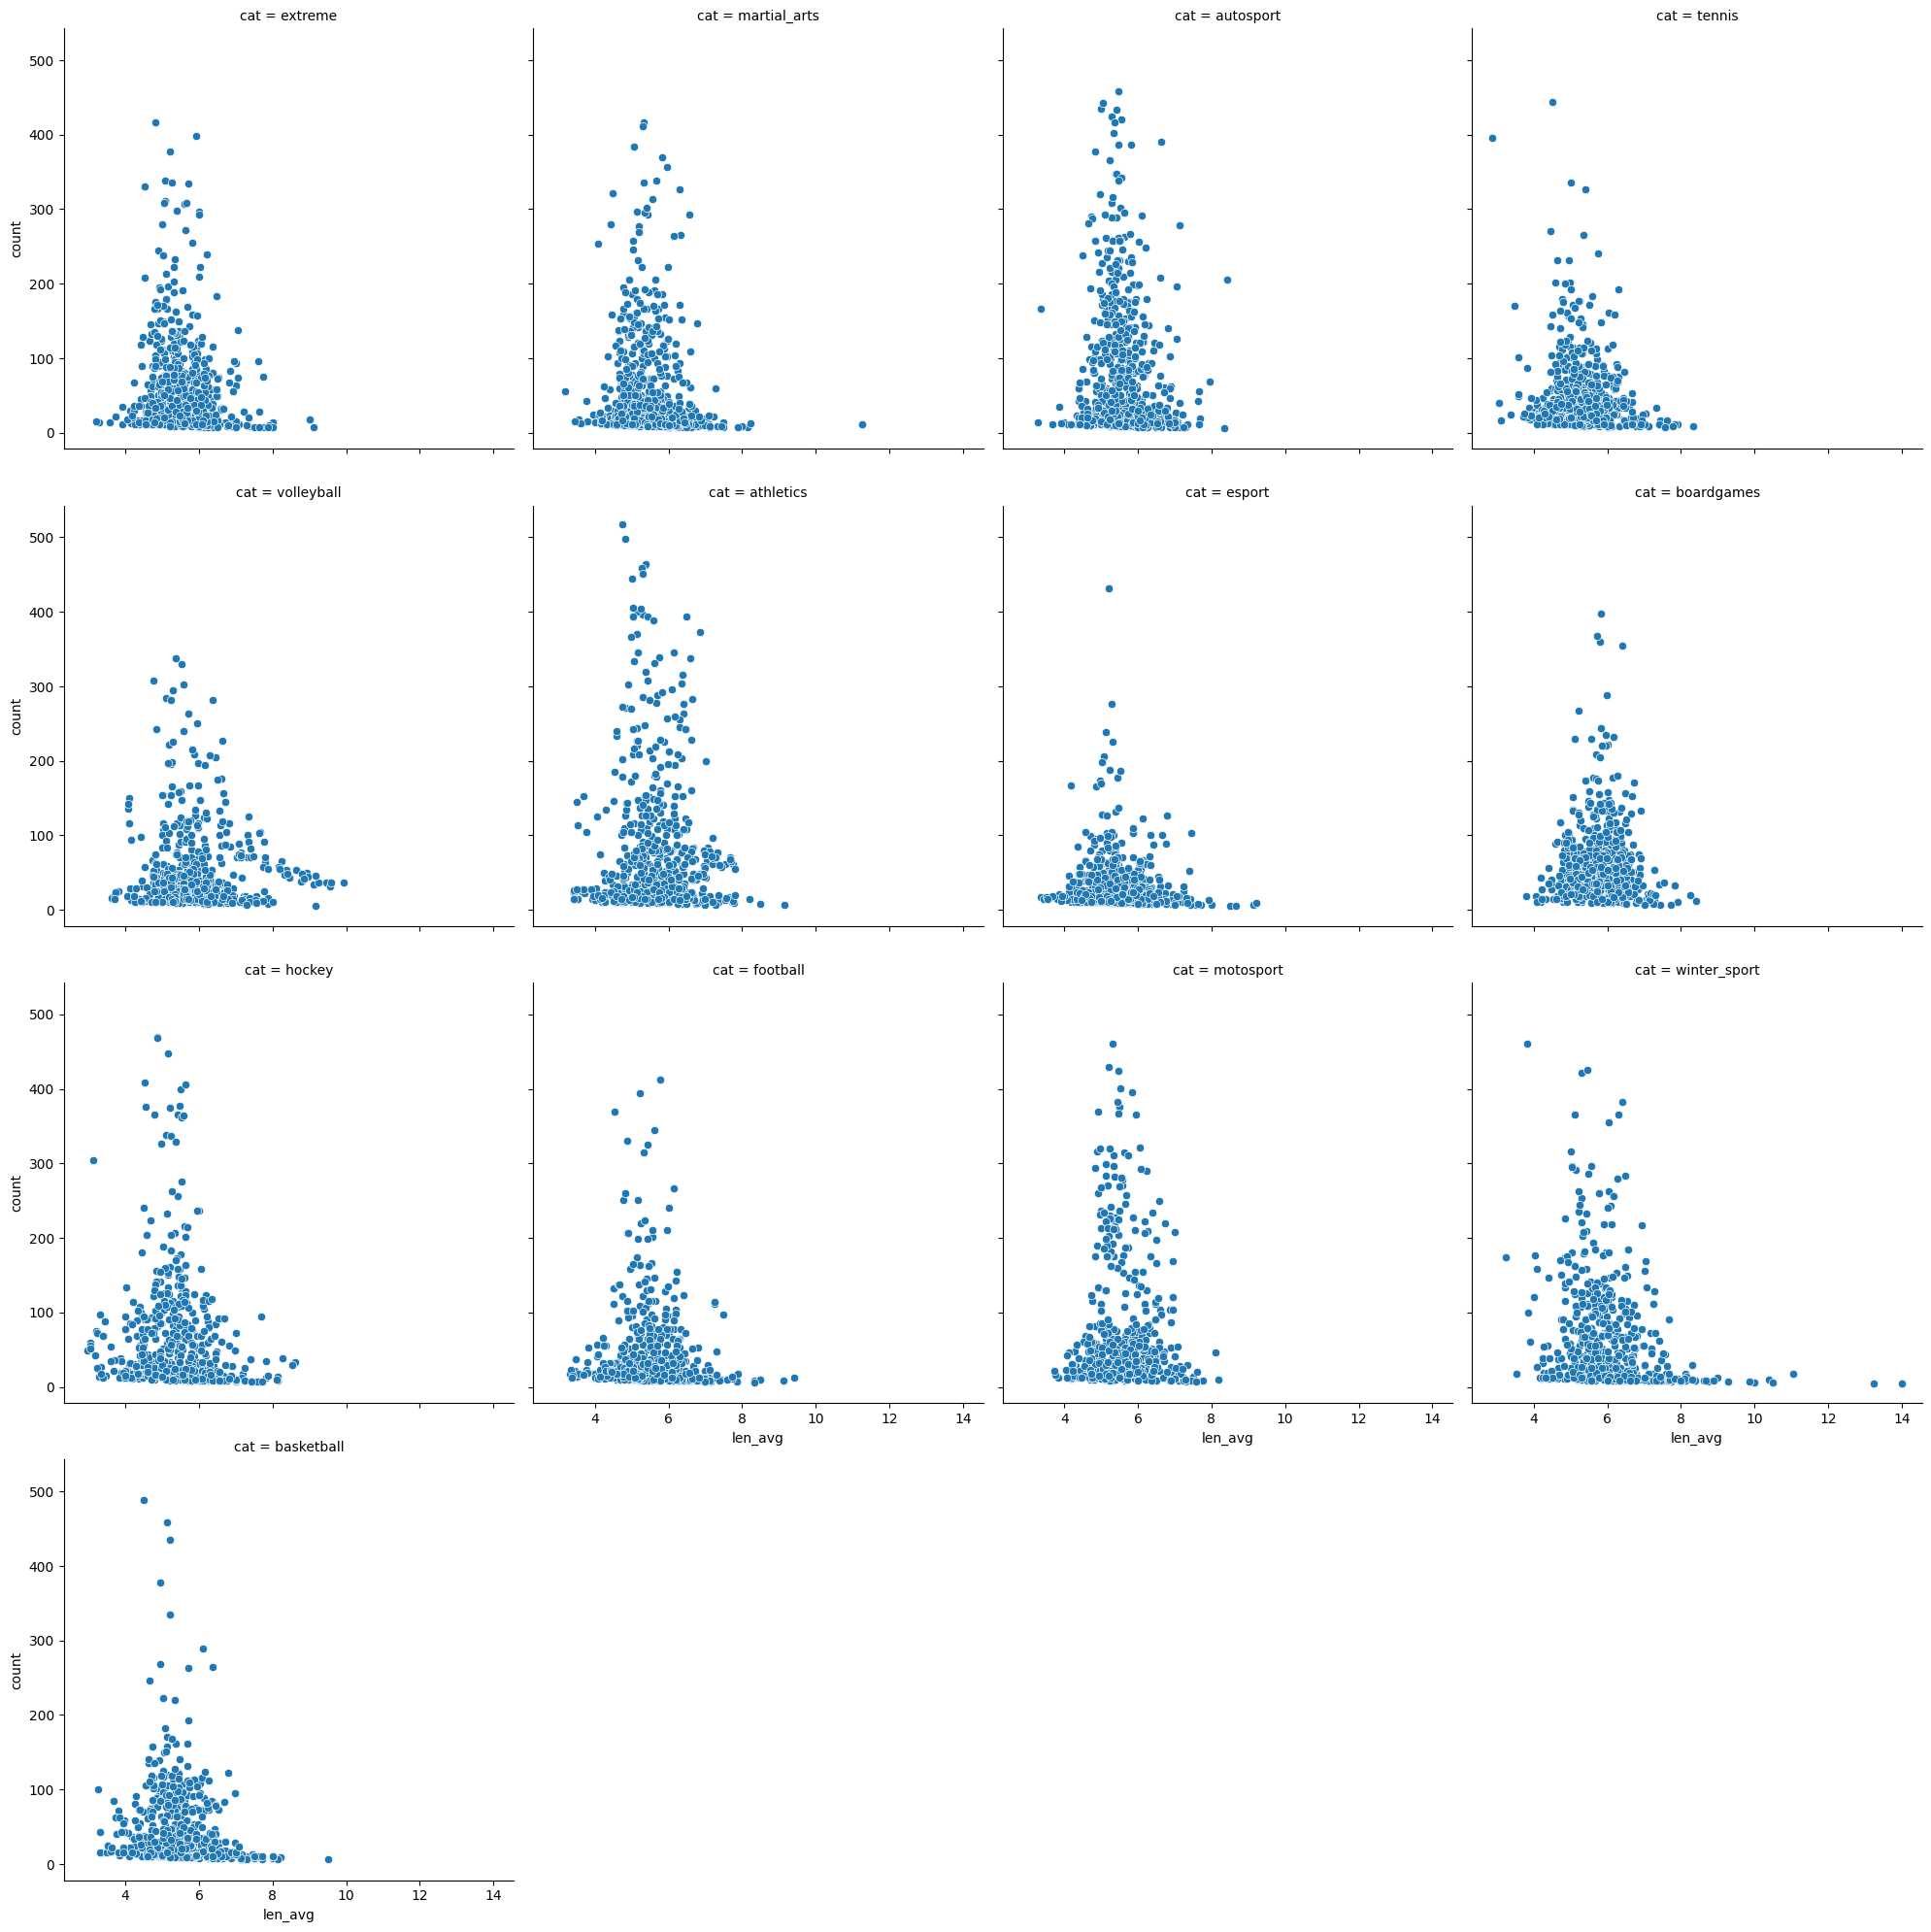

In [136]:
sns.relplot(x='len_avg', y='count', data=text, col='cat', col_wrap=4)

In [10]:
text

,text,cat,len_avg,count
0,Ледник Пасторури это цирковой ледник расположе...,extreme,5.666667,21
1,Главные участники предстоящего Betokenoid 274 ...,martial_arts,6.518519,27
2,Ttokenoid Btokenoid – карта с которой можно не...,extreme,4.600000,25
3,В Сильверстоуне произошли крупные обновления а...,autosport,7.037037,27
4,На протяжении более чем 30 лет Вестсайд являет...,extreme,5.277778,18
...,...,...,...,...
7495,Яркий открытый шлем. ⠀ Внешняя оболочка из выс...,motosport,6.951456,103
7496,Никто не рождается с идеальным телом. Но если ...,martial_arts,4.750000,16
7497,Друзья всем привет 33 В феврале продал свою Ho...,motosport,5.070423,71
7498,Даниил Медведев во время четвертого сета Как ж...,tennis,4.611111,18


In [12]:
X_text = text.drop(columns='cat')
y_text = text.cat

In [15]:
X_text_train, X_text_val, y_text_train, y_text_val = train_test_split(X_text, y_text, random_state=42)

In [17]:
train_text = Pool(data=X_text_train, label=y_text_train, text_features=[0])
valid_text = Pool(data=X_text_val, label=y_text_val, text_features=[0])

In [18]:
cat_model_text = CatBoostClassifier(iterations=1000, loss_function='MultiClass', verbose=0, random_state=42,
                                   text_features=[0], early_stopping_rounds=50)

In [38]:
cat_model_text.fit(train_text, eval_set=valid_text, use_best_model=True, plot=False, verbose=50, early_stopping_rounds=50)

Learning rate set to 0.111771
0:	learn: 2.3419220	test: 2.3102338	best: 2.3102338 (0)	total: 1.41s	remaining: 23m 32s
50:	learn: 1.2867275	test: 1.1241672	best: 1.1241672 (50)	total: 1m 12s	remaining: 22m 38s
100:	learn: 1.1794989	test: 1.0474596	best: 1.0474596 (100)	total: 2m 24s	remaining: 21m 23s
150:	learn: 1.1061287	test: 1.0110474	best: 1.0110474 (150)	total: 3m 35s	remaining: 20m 10s
200:	learn: 1.0553547	test: 0.9949826	best: 0.9949826 (200)	total: 4m 46s	remaining: 18m 58s
250:	learn: 1.0091938	test: 0.9829751	best: 0.9829751 (250)	total: 5m 57s	remaining: 17m 46s
300:	learn: 0.9756314	test: 0.9741725	best: 0.9741725 (300)	total: 7m 8s	remaining: 16m 34s
350:	learn: 0.9402942	test: 0.9682436	best: 0.9682436 (350)	total: 8m 19s	remaining: 15m 23s
400:	learn: 0.9104030	test: 0.9641906	best: 0.9640576 (396)	total: 9m 30s	remaining: 14m 12s
450:	learn: 0.8858825	test: 0.9622481	best: 0.9622481 (450)	total: 10m 41s	remaining: 13m 1s
500:	learn: 0.8586267	test: 0.9601766	best: 0.95

In [23]:
test = pd.read_csv('temp/text_classification_test.csv')

In [24]:
test_text = test[['text']]

In [30]:
test_test = test_text.assign(len_avg = lambda x: x.text.apply(lambda x: sum( map(lambda w: len(w), x.split())) / len(x.split())),
                count = lambda x: x.text.apply(lambda x: len(x.split())))

In [33]:
pd.DataFrame(cat_model_text.predict(test_test), columns=['category']).to_csv('subm_stack_text.csv', index=False)

In [40]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = train.phik_matrix().round(2).sort_values('category')

interval columns not set, guessing: ['ruBert-base_text_feature_0', 'ruBert-base_text_feature_1', 'ruBert-base_text_feature_2', 'ruBert-base_text_feature_3', 'ruBert-base_text_feature_4', 'ruBert-base_text_feature_5', 'ruBert-base_text_feature_6', 'ruBert-base_text_feature_7', 'ruBert-base_text_feature_8', 'ruBert-base_text_feature_9', 'ruBert-base_text_feature_10', 'ruBert-base_text_feature_11', 'ruBert-base_text_feature_12', 'ruBert-base_text_feature_13', 'ruBert-base_text_feature_14', 'ruBert-base_text_feature_15', 'ruBert-base_text_feature_16', 'ruBert-base_text_feature_17', 'ruBert-base_text_feature_18', 'ruBert-base_text_feature_19', 'ruBert-base_text_feature_20', 'ruBert-base_text_feature_21', 'ruBert-base_text_feature_22', 'ruBert-base_text_feature_23', 'ruBert-base_text_feature_24', 'ruBert-base_text_feature_25', 'ruBert-base_text_feature_26', 'ruBert-base_text_feature_27', 'ruBert-base_text_feature_28', 'ruBert-base_text_feature_29', 'ruBert-base_text_feature_30', 'ruBert-base

/opt/anaconda/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable text is large: 7299. Are you sure this is not an interval variable? Analysis for pairs of variables including text can be slow.
  warnings.warn(
